<a href="https://colab.research.google.com/github/Narissarach/Project_eye/blob/main/gradd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grad-CAM

In [1]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่า Mounted at /content/drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import keras

In [63]:
from keras.applications.vgg16 import VGG16
from keras import backend as K
import keras.backend as K
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import pandas as pd
import tensorflow as tf
from keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import seaborn as sns
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
K.clear_session()

In [64]:
# กำหนดโมเดล CNN ที่ต้องการ
model = keras.models.load_model('/content/drive/MyDrive/2022Project/for_code/Model/modelOCT.h5')

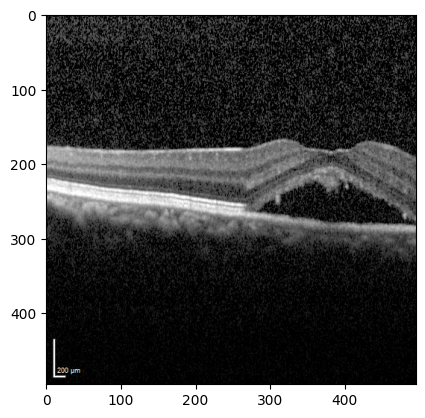

In [65]:
# นำภาพที่ต้องการทำ activation map มาเตรียม
img_path = ("/content/drive/My Drive/lastoct/test/CSC/FQ8979 23-03-12 RE_000_cropped.png")  # ภาพที่ต้องการทำ activation map
img=mpimg.imread(img_path)
plt.imshow(img)

ปรับขนาดภาพให้พอดีกับขนาดอินพุตของโมเดล

In [66]:
img = load_img(img_path, target_size=(256, 256))

แปลงรูปภาพเป็นอาร์เรย์ numpy

In [67]:
x = img_to_array(img)

ปรับรูปร่างข้อมูลใหม่เป็น 'batch form' เพื่อให้โมเดลสามารถยอมรับได้

In [68]:
x = np.expand_dims(x, axis=0)

In [69]:
x.shape

(1, 256, 256, 3)

Preprocessing

In [70]:
x = preprocess_input(x)

Predictions

In [71]:
# Define ImageNet classes
imagenet_classes = ["CSC", "Normal", "PCV", "VKH"]

In [72]:
# Make a prediction
preds = model.predict(x)

1/1 [==============================] - 0s 98ms/step


In [73]:
# Find the class with the highest probability
class_index = np.argmax(preds[0])

In [74]:
# Print the class name
class_name = imagenet_classes[class_index]
print(f"Predicted class: {class_name}")

Predicted class: CSC


Getting the index of the prediction.

In [75]:
argmax = np.argmax(preds[0])

In [76]:
output = model.output[:, argmax]

Model Archtecture

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [78]:
last_conv_layer = model.get_layer('conv2d_2')

In [87]:
# Define input and function
x = tf.constant(1.0)
y = x ** 2

# Use GradientTape to compute the gradient
with tf.GradientTape() as tape:
    grads = tape.gradient(y, x)
print(dy_dx)

# Print the gradient
print(grads)

tf.Tensor(6.0, shape=(), dtype=float32)
None


In [146]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

AttributeError: ignored

# คั่น

1/1 [==============================] - 1s 824ms/step


IndexError: ignored

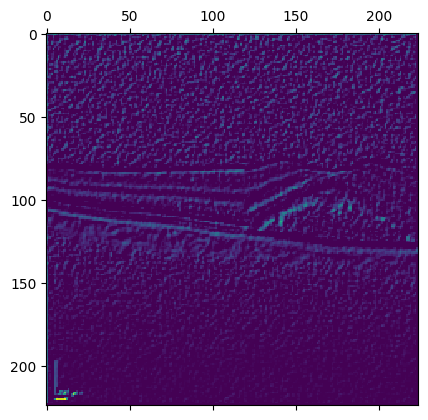

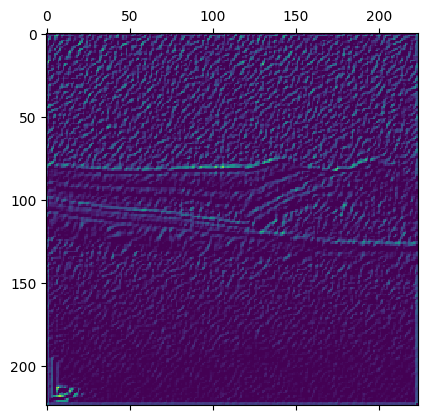

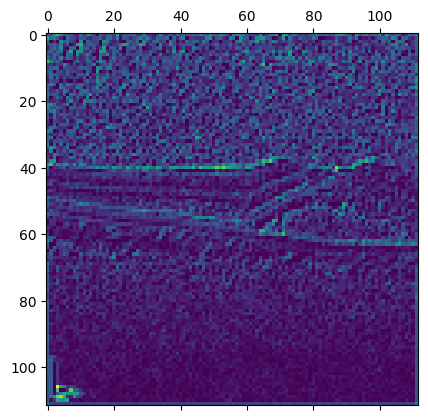

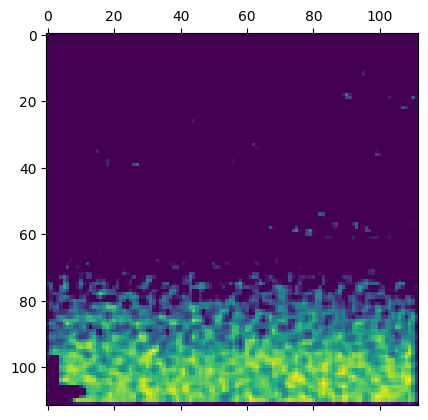

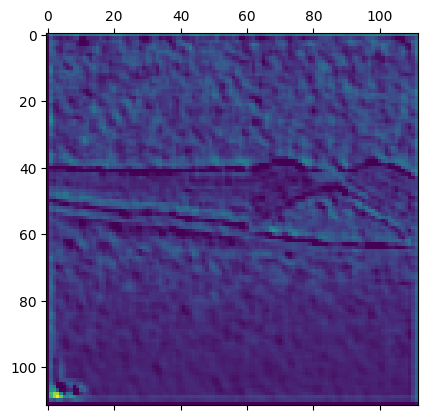

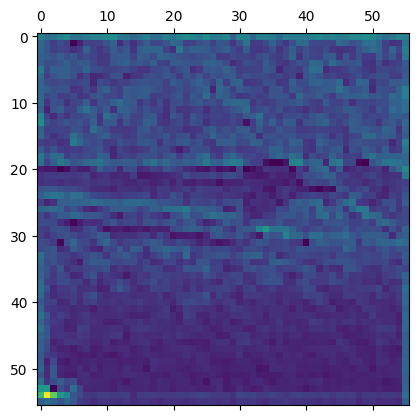

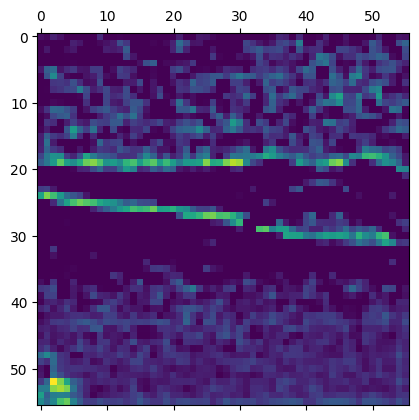

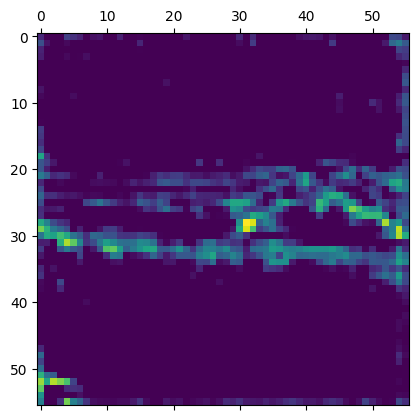

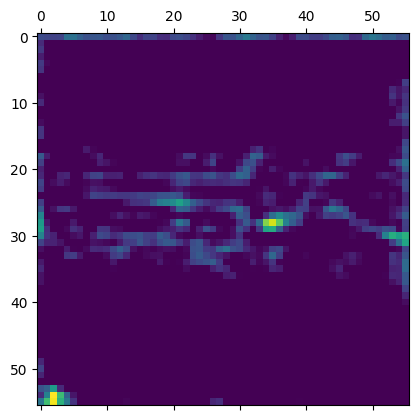

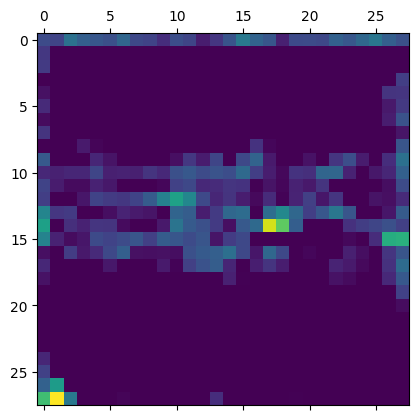

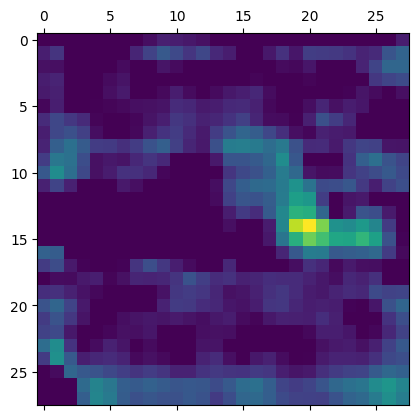

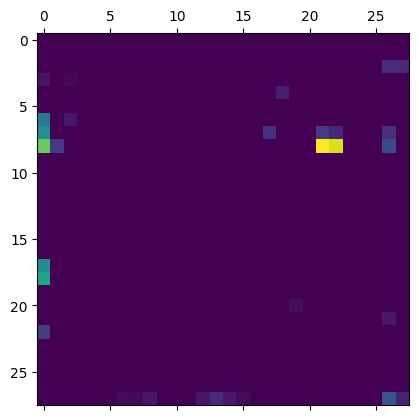

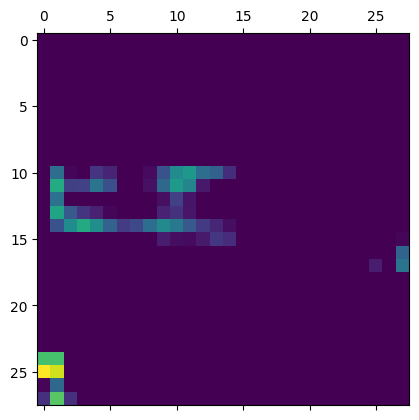

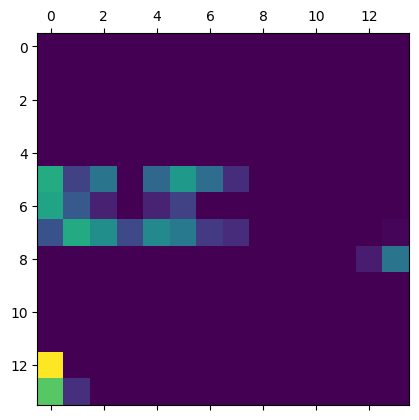

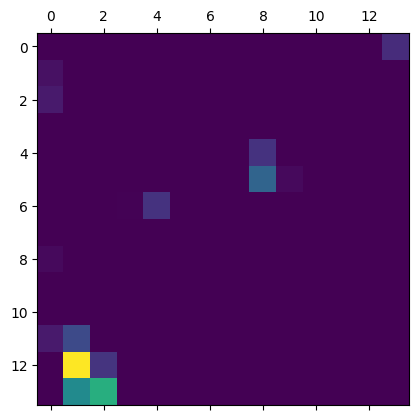

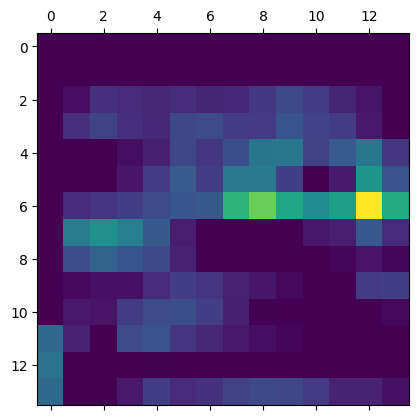

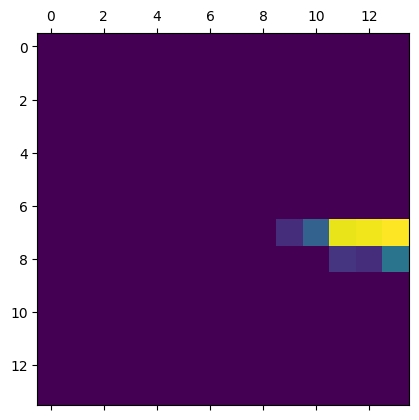

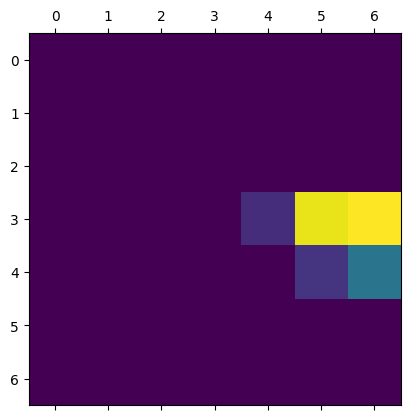

In [145]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=True)

# extract the feature maps from the intermediate layers
layer_outputs = [layer.output for layer in model.layers[1:]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# load the OCT image
img_path = '/content/drive/My Drive/lastoct/test/CSC/FQ8979 23-03-12 RE_000_cropped.png' # ตำแหน่งและชื่อไฟล์ของภาพที่ต้องการใช้
img = load_img(img_path, target_size=(224, 224))

# preprocess the image
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# calculate the activation maps
activations = activation_model.predict(x)

# plot the activation maps
for i in range(len(activations)):
    plt.matshow(activations[i][0, :, :, 0], cmap='viridis')